In [2]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import time

In [3]:
# 导入数据
data = pd.read_csv('data/data_stocks.csv')

In [145]:
# 查看信息
# data.head()
data.describe()
# data.info()

# plt.plot(data['SP500'])

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,41.690000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,43.650000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,44.935000,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,47.830000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [5]:
# 去除DATE行，分割数据集
data.drop('DATE', axis=1, inplace=True)
data_train = data.iloc[:int(data.shape[0] * 0.8), :]
data_test = data.iloc[int(data.shape[0] * 0.8):, :]
print(data_train.shape, data_test.shape)

(33012, 501) (8254, 501)


In [171]:
# 数据归一化
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

data_train

array([[-0.84455651, -0.85709957, -0.84812269, -0.85603116],
       [-0.8432535 , -0.84159714, -0.83783297, -0.84131221],
       [-0.82189365, -0.84230612, -0.82601114, -0.84054672],
       ...,
       [-0.12553734, -0.12806142, -0.12820231, -0.12391918],
       [-0.1569945 , -0.11842488, -0.12808868, -0.14658263],
       [-0.15617963, -0.1559254 , -0.16045077, -0.15895353]])

MSE Test: 0.005888705442090653


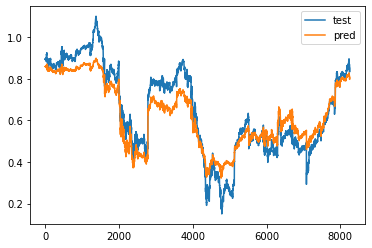

In [80]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

input_dim = X_train.shape[1]
hidden_1 = 512
hidden_2 = 256
hidden_3 = 128
output_dim = 1
batch_size = 256
epochs = 10

X = Input(shape=[input_dim,])
h = Dense(hidden_1, activation='relu')(X)
h = Dense(hidden_2, activation='relu')(h)
h = Dense(hidden_3, activation='relu')(h)
Y = Dense(output_dim, activation='sigmoid')(h)

model = Model(X, Y)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=False)
y_pred = model.predict(X_test)
print('MSE Train:', model.evaluate(X_train, y_train, batch_size=batch_size))
print('MSE Test:', model.evaluate(X_test, y_test, batch_size=batch_size))
plt.plot(y_test, label='test')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()

# 异步预测¶

异步预测是指，使用历史若干个时刻的大盘指数，预测当前时刻的大盘指数，这样才更加符合预测的定义

例如，使用前五个大盘指数，预测当前的大盘指数，每组输入包括5个step，每个step对应一个历史时刻的大盘指数，输出一维，即[None, 5, 1] => [None, 1]

使用Keras实现异步预测，主要用到循环神经网络即RNN（Recurrent Neural Network）中的LSTM（Long Short-Term Memory）


In [124]:
class LSTM(tf.keras.Model):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.inp = tf.keras.layers.Input(shape=[input_dim, 1, ])
        self.lstm = tf.keras.layers.LSTM(128, activation='relu')
        self.out = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.inp(inputs)
        h = self.lstm(x)
        output = self.out(h)
        return output

In [172]:
output_dim = 1
batch_size = 256
epochs = 10
seq_len = 5
hidden_size = 128

# 例如，使用前五个大盘指数，预测当前的大盘指数，每组输入包括5个step，每个step对应一个历史时刻的大盘指数，输出一维，即[None, 5, 1] => [None, 1]
X_train = np.array([data_train[i : i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])[:, :, np.newaxis]
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])
X_test = np.array([data_test[i : i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])[:, :, np.newaxis]
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4099, 5, 1) (4099,) (1021, 5, 1) (1021,)


In [126]:
model = LSTM(input_dim, output_dim)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())


In [127]:
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

TypeError: in converted code:

    <ipython-input-120-90f534ff52fd>:9 call  *
        x = self.inp(inputs)
    /usr/local/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/autograph/impl/api.py:427 converted_call
        f in m.__dict__.values() for m in (collections, pdb, copy, inspect, re)):
    /usr/local/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/autograph/impl/api.py:427 <genexpr>
        f in m.__dict__.values() for m in (collections, pdb, copy, inspect, re)):
    /usr/local/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/ops/math_ops.py:1336 tensor_equals
        return gen_math_ops.equal(self, other)
    /usr/local/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/ops/gen_math_ops.py:3627 equal
        name=name)
    /usr/local/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py:536 _apply_op_helper
        repr(values), type(values).__name__, err))

    TypeError: Expected float32 passed to parameter 'y' of op 'Equal', got 'collections' of type 'str' instead. Error: Expected float32, got 'collections' of type 'str' instead.


In [183]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

output_dim = 1
batch_size = 256
epochs = 50
seq_len = 10
hidden_size = 256

X_train = np.array([data_train[i : i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])[:, :, np.newaxis]
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])
X_test = np.array([data_test[i : i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])[:, :, np.newaxis]
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X_train

(4094, 10, 1) (4094,) (1016, 10, 1) (1016,)


array([[[-0.84455651],
        [-0.8432535 ],
        [-0.82189365],
        ...,
        [-0.83744312],
        [-0.84358024],
        [-0.8339435 ]],

       [[-0.8432535 ],
        [-0.82189365],
        [-0.80116365],
        ...,
        [-0.84358024],
        [-0.8339435 ],
        [-0.83658494]],

       [[-0.82189365],
        [-0.80116365],
        [-0.78994048],
        ...,
        [-0.8339435 ],
        [-0.83658494],
        [-0.83103437]],

       ...,

       [[-0.11409766],
        [-0.10816918],
        [-0.10583873],
        ...,
        [-0.13861858],
        [-0.12972586],
        [-0.13243028]],

       [[-0.10816918],
        [-0.10583873],
        [-0.11878612],
        ...,
        [-0.12972586],
        [-0.13243028],
        [-0.12553734]],

       [[-0.10583873],
        [-0.11878612],
        [-0.10962177],
        ...,
        [-0.13243028],
        [-0.12553734],
        [-0.1569945 ]]])

MSE Test: 0.00048402342789505764


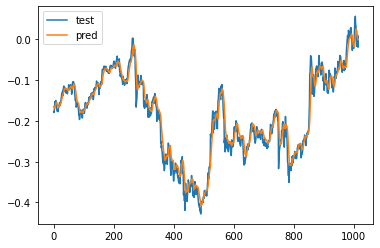

In [184]:
X = Input(shape=[X_train.shape[1], X_train.shape[2],])
h = LSTM(hidden_size, activation='relu')(X)
Y = Dense(output_dim,)(h)

model = Model(X, Y)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=False)
y_pred = model.predict(X_test)
print('MSE Train:', model.evaluate(X_train, y_train, batch_size=batch_size))
print('MSE Test:', model.evaluate(X_test, y_test, batch_size=batch_size))
plt.plot(y_test, label='test')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()

,over,begin,high,low
count,5130.000000,5130.000000,5130.000000,5130.000000
mean,2501.435998,2499.245329,2521.494561,2475.855737
std,879.225711,878.311143,889.068795,865.516759
min,1011.500000,1007.900000,1019.920000,998.230000
25%,1779.787500,1784.537500,1794.025000,1765.057500
50%,2432.765000,2430.395000,2449.260000,2410.165000
75%,3071.062500,3064.810000,3089.910000,3044.247500
max,6092.060000,6057.430000,6124.040000,6040.710000


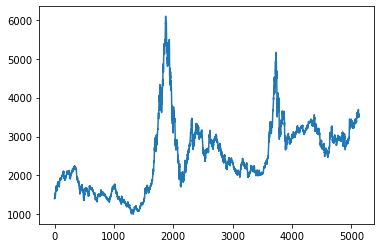

In [169]:
A_stock = pd.read_csv("data/shangzheng.csv")

# A_stock['over'].astype('float')

# A_stock.info()

# A_stock.describe()

plt.plot(A_stock['over'])

data = A_stock

data.describe()

In [170]:
data = data.loc[:, ['over', 'begin', 'high', 'low']]
data_train = data.iloc[:int(data.shape[0] * 0.8), :]
data_test = data.iloc[int(data.shape[0] * 0.8):, :]
print(data_train.shape, data_test.shape)

(4104, 4) (1026, 4)


In [ ]:
output_dim = 1
batch_size = 256
epochs = 10
seq_len = 5
hidden_size = 128

# 例如，使用前五个大盘指数，预测当前的大盘指数，每组输入包括5个step，每个step对应一个历史时刻的大盘指数，输出一维，即[None, 5, 1] => [None, 1]
X_train = np.array([data_train[i : i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])[:, :, np.newaxis]
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])
X_test = np.array([data_test[i : i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])[:, :, np.newaxis]
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)